In [49]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Hypothesis Testing

Because the national average for mortgage approval is 92%, this is the value used for hypothesis testing. 
[Source](https://www.nerdwallet.com/article/mortgages/data-mortgage-denial)
* $H_0$: Applicants are approved for mortgages at a rate of 92% or higher if their race is black.

* $H_a$: Applicants are approved at a rate lower than 92% if their race is not black.

However, because the dataset is specifically for Wells Fargo, I'm not sure if their approval rate will be in line with the national average. So, I'll run a second hypothesis test, which uses the overall loan approval rate for the actual dataset. This value was calculated by dividing the number of approvals by the total number of applicants, for all applicants, regardless of race. I rounded this number down from 95.7% to 95%. 
* $H_0$: Applicants are approved for mortgages at a rate of 95% or higher if their race is black.

* $H_a$: Applicants are approved at a rate lower than 95% if their race is black.

*Setting a threshold*
$\alpha = 0.05$

In [4]:
# Creating a binomial distribution for the first and second hypothesis test, 
# using the total number of black applicants
national = stats.binom(n=3528, p = 0.92)
wells = stats.binom(n=3528, p = 0.95)

#### Hypothesis Test 1: Using the national average in a one-tailed test

In [10]:
# null hypothesis is p=0.92. Number of black applicants approved: 3226
print(1 - national.cdf(3226))

# what's the threshhold at alpha = 0.05
print(national.ppf(0.95))

# Fail to reject.

0.8833200891233322
3272.0


In [7]:
3226/3528

0.9143990929705216

#### Hypothesis Test 2: Using the national average in a one-tailed test

In [6]:
# null hypothesis is p=0.95. Number of black applicants approved: 3226
print(1 - wells.cdf(3226))

# what's the threshhold at alpha = 0.05
print(wells.ppf(0.95))

# Fail to reject.

1.0
3373.0


#### Hypothesis Test 3: Using  a two-sample test to compare approval rates for white and black applicants: 
* $H_0$: White applicants are approved for mortgages at a higher rate than black applicants. 

* $H_a$: Black applicants are approved at a lower rate than white applicants.

$\alpha = 0.05$

* Total number of applicants: 
* Total white applicants: 267754
* Total white approvals: 257913
* Total black applicants: 17805
* Total black approvals: 16275

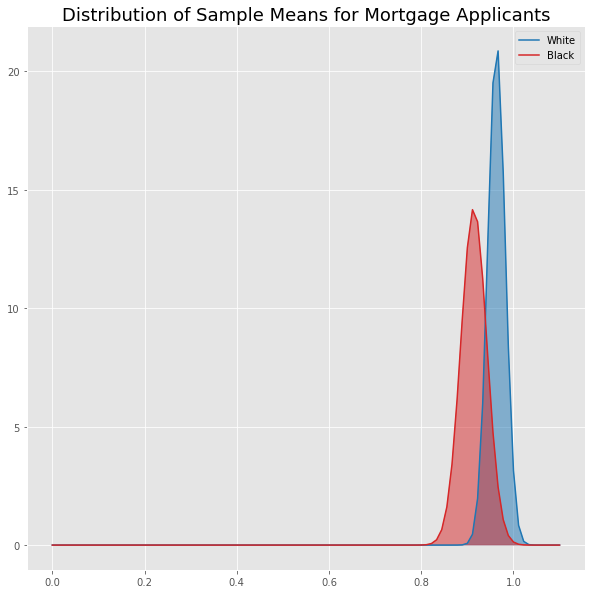

In [55]:
# Setting up sample size and proportions approved out of sample
n= 100

white_proportion = 257913/267754
black_proportion = 16275/17805

# sample mean == population mean
white_sample_mean = white_proportion
black_sample_mean = black_proportion

# population standard deviations
white_sd = np.sqrt(white_proportion * (1-white_proportion))
black_sd = np.sqrt(black_proportion * (1-black_proportion))

# sample mean std
white_sample_sd = white_sd/np.sqrt(n)
black_sample_sd = black_sd/np.sqrt(n)

# Normal distributions for the sample means and std
white_norm = stats.norm(white_sample_mean, white_sample_sd)
black_norm = stats.norm(black_sample_mean, black_sample_sd)

#  x-axis array
x = np.linspace(0, 1.1, 100)

# probability density functions
white_pdf = white_norm.pdf(x)
black_pdf = black_norm.pdf(x)

# Plot the density functions. Note: alpha is transparency of graph, not hypothesis threshold
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, white_pdf, color='tab:blue', label='White')
ax.fill(x, white_pdf, color='tab:blue', alpha=0.5)
ax.plot(x, black_pdf, color='tab:red', label='Black')
ax.fill(x, black_pdf, color='tab:red', alpha=0.5)
ax.set_xlabel('')

ax.legend()
ax.set_title("Distribution of Sample Means for Mortgage Applicants", fontsize=18)
plt.savefig('sample_mean_dist')

In [43]:
# Create an array of approval and denials
white_approved = [1]*int(n*white_proportion)
white_denied = [0]*int(n*(1-white_proportion))
black_approved = [1]*int(n*black_proportion)
black_denied = [0]*int(n*(1-black_proportion))

white_sample = np.array(white_approved + white_denied)
black_sample = np.array(black_approved + black_denied)

In [44]:
# Run Mann-Whitney test: pvalue = 0.06. Fail to reject the null hypothesis
print(f"Mann-Whitney U test p-value: {stats.mannwhitneyu(black_sample, white_sample, alternative = 'less')[1]}")

Mann-Whitney U test p-value: 0.06126814753892051


## Considering the ratio between Type I and Type II Errors
* Type I Error ($\alpha$): 
    * This is the false positive rate, or the probability the null hypothesis is rejected incorrectly
* Type II Error ($\beta$): 
    * This is the false negative rate, or the probability that we incorrectly fail to reject the null hypothesis
* From an equity viewpoint, failing to reject the null hypothesis when we should have (maintaining the status quo and assuming that black and white applicants are approved at the same rate) would be more concerning than rejecting the status quo and assuming that there is a racial disparity in mortgage loan approval rates. 
    * Setting $\beta$ at a lower threshold than $\alpha$

In [38]:
# Code Credit: Kacie Webster
def compute_power(n, sigma, alpha, mu0, mua):
    std_error = sigma/n**0.5
    h0 = stats.norm(mu0, std_error)
    ha = stats.norm(mua, std_error)
    critical_val = h0.ppf(1-alpha)
    power = 1- ha.cdf(critical_value)
    return power

In [41]:
# Assume we want to see black applicants with the same approval rate as white applicants (sigma)
sample_size(sigma = np.sqrt(0.09 * 0.91), alpha = 0.05, beta = 0.001, effect_size = 0.04)

1147

# Considerations: 
* Create validation set for race and for ethnicity 
* Run the model with all samples and print confusion matrix
* select only rows where applicant is black, plot a confusion matrix
* Repeat with other races, ethnicities
* confusion matrix should have the same proportions of type 1 and type 2 errors for all races
* Action Taken - 1 is approved. Change column name to Approval